# Udacity Deep RL NanoDegree - Project 2 - Continuous Control
---
In this notebook, we will implement a Deep Deterministec Policy Gradient (DDPG) agent to solve the Unity ML-Agents environment about  a 2 joint robotic arm attempting to follow a moving target circling around the arm.

### 1. Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Next, start the Unity environment.  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 3. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

print('\nAnd the full state for agent is the following shape: {}'.format(states.shape))

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]

And the full state for agent is the following shape: (20, 33)


Finally, Instantiate the agent and load the Neural Network to memory.

In [5]:
# Import the DDPG agent
from ddpg_agent import Agent

# Instantiate the Agent
agent = Agent(state_size=33, action_size=4, num_agents=num_agents, random_seed=1)

### 4. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.

In [6]:
## Prepare Environment
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

## Run the Agent
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break

print("scores = {}".format(scores))        
        
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

scores = [0.         0.51999999 0.42999999 0.         0.         0.
 1.24999997 0.         0.72999998 0.         0.         0.
 0.37999999 0.         0.17       0.03       0.28999999 0.
 0.         0.        ]
Total score (averaged over agents) this episode: 0.18999999575316906


### 5. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.



/home/said/.anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 0.18
Episode 2	Average Score: 0.02
Episode 3	Average Score: 0.00
Episode 4	Average Score: 0.05
Episode 5	Average Score: 0.10
Episode 6	Average Score: 0.04
Episode 7	Average Score: 0.02
Episode 8	Average Score: 0.01
Episode 9	Average Score: 0.03
Episode 10	Average Score: 0.02
Episode 11	Average Score: 0.01
Episode 12	Average Score: 0.02
Episode 13	Average Score: 0.02
Episode 14	Average Score: 0.02
Episode 15	Average Score: 0.01
Episode 16	Average Score: 0.02
Episode 17	Average Score: 0.01
Episode 18	Average Score: 0.01
Episode 19	Average Score: 0.07
Episode 20	Average Score: 0.18
Episode 21	Average Score: 0.16
Episode 22	Average Score: 0.59
Episode 23	Average Score: 0.67
Episode 24	Average Score: 0.93
Episode 25	Average Score: 1.01
Episode 26	Average Score: 0.97
Episode 27	Average Score: 1.36
Episode 28	Average Score: 1.61
Episode 29	Average Score: 1.62
Episode 30	Average Score: 1.46
Episode 31	Average Score: 1.61
Episode 32	Average Score: 1.96
Episode 33	Averag

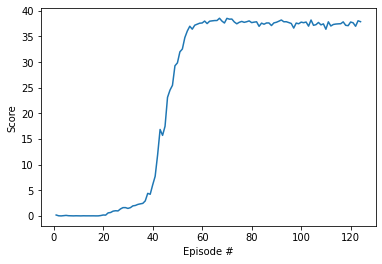

In [7]:
def ddpg(n_episodes=1000, max_t=3000, print_every=10):
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    # Queue to store the last 100 mean scores
    scores_deque = deque(maxlen=100)
    # Full score list to return and later plot.
    scores = []
    
    for i_episode in range(1, n_episodes+1):        
        # Restart the Environment in train mode 
        env_info = env.reset(train_mode=True)[brain_name]
        # Get the initial state
        states = env_info.vector_observations
        # Reset the agents
        agent.reset()
        # Set the score of each agent to 0
        score = np.zeros(num_agents)

        while(True):
            # Select Action
            actions = agent.act(states)
            
            # Step the Environment and gather all the information of the timestep
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
       
            # Run the learning process on the agent.
            agent.step(states, actions, rewards, next_states, dones)
            
            # Save rewards and state
            states = next_states                               # roll over states to next time step
            score += rewards                                  # update the score (for each agent)

            # Check if the Episode if over
            if np.any(dones):
                break
            
        # Save the mean score of the episode, both to calculate the running average
        # and to later return the list of all the scores in the training
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, scores[-1]))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0 and i_episode > 100 == 0:
            print('\r [+] Episode {}\t 100-Moving Average Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        # Stop the code if the training already succeded    
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(np.mean(scores_deque))))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_SUCCESS.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_SUCCESS.pth')
            break  
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [6]:
## load the weights from file
# Weights of the Actor
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_SUCCESS.pth'))
# Weights of the Critic
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_SUCCESS.pth'))


## Prepare Environment
# Restart the Environment
env_info = env.reset(train_mode=False)[brain_name]
# Get the initial state
states = env_info.vector_observations
# Reset the agents
agent.reset()
# Set the score of each agent to 0
score = np.zeros(num_agents)
     
## Run the Agent
while(True):
    # Select Action
    actions = agent.act(states)
    # Step the Environment and gather all the information of the timestep
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    # Save rewards and state
    states = next_states                               # roll over states to next time step
    score += rewards                                  # update the score (for each agent)

    # Check if the Episode if over
    if np.any(dones):
        break

## Print the results
print('Total score (averaged over agents) this episode: {}'.format(np.mean(score)))


/home/said/.anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score (averaged over agents) this episode: 37.642999158613385


Finally, close the environment.

In [7]:
env.close()